In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Select images for color segmentation. Make sure the ROI in each is distinctly colored.

In [3]:
img = plt.imread("coat.jpeg")
img_crop = plt.imread("coat_pink.jpeg")

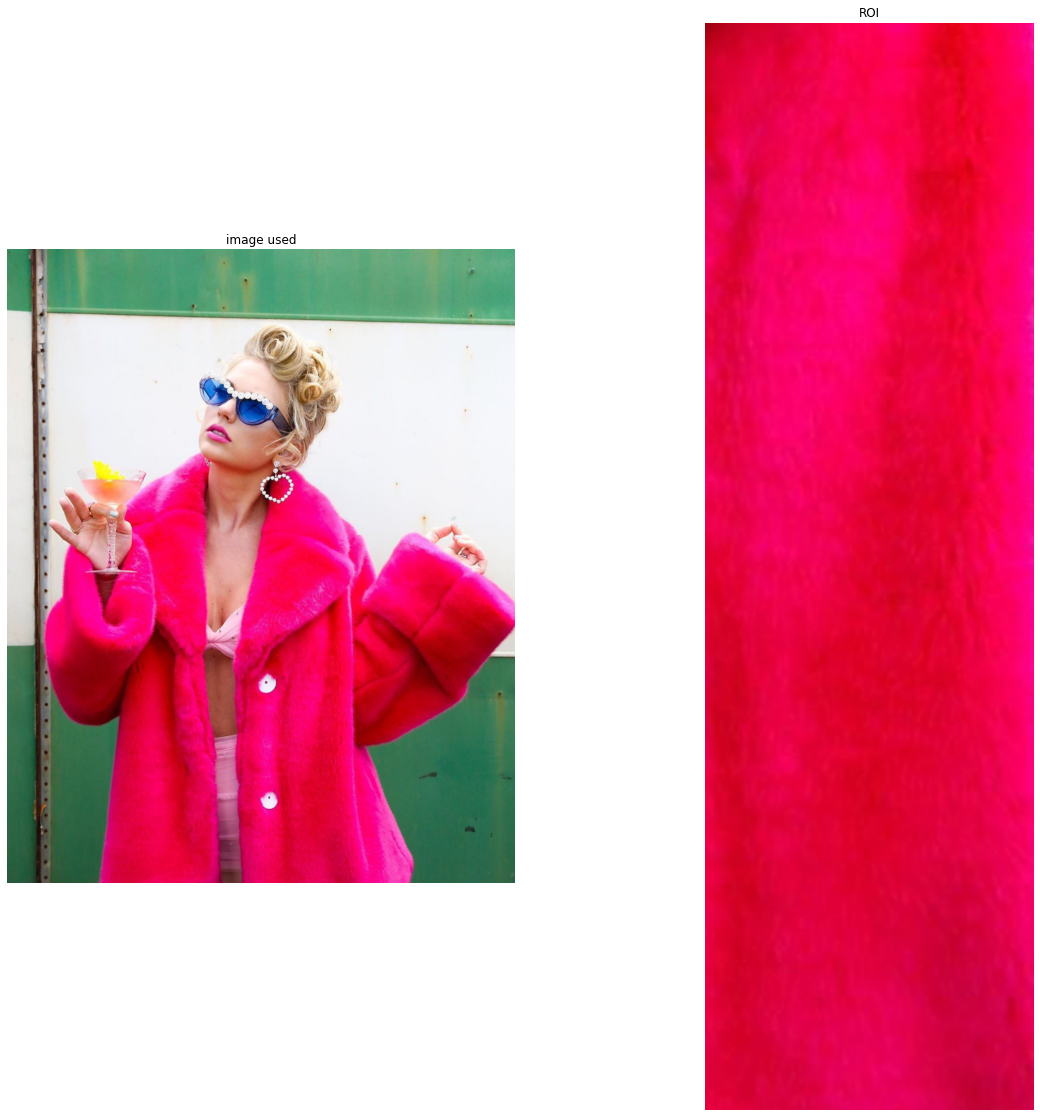

In [4]:
plt.figure(figsize = (20,20))

plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.title("image used")

plt.subplot(122)
plt.imshow(img_crop)
plt.axis("off")
plt.title("ROI")

plt.show()

In [5]:
# Separating the RGB channels

#Separating the channels

def RGB(array):
    return array[:,:,0], array[:,:,1], array[:,:,2]

def RGB_histogram(array, normalized):
    R_img, G_img, B_img = RGB(array)
    array_01, bins_01 = np.histogram(R_img, bins = 255, density = normalized)
    array_02, bins_02 = np.histogram(G_img, bins = 255, density = normalized)
    array_03, bins_03 = np.histogram(B_img, bins = 255, density = normalized)
    return (bins_01[:-1], array_01), (bins_02[:-1], array_02), (bins_03[:-1], array_03)

### Thresholding

In [6]:
R_img, G_img, B_img = RGB(img)

R_img_crop_hist, G_img_crop_hist, B_img_crop_hist = RGB_histogram(img_crop, normalized = True)

In [7]:
R,G,B = RGB(img_crop)

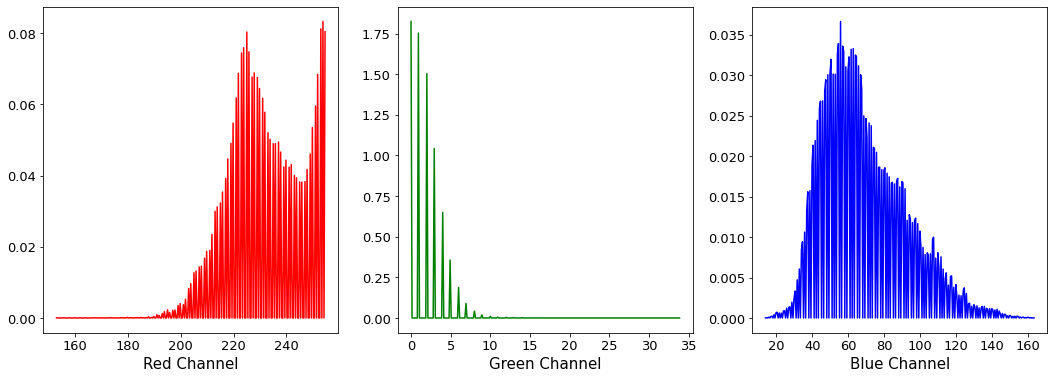

In [8]:
plt.figure(figsize = [18,6])

plt.subplot(131)
plt.plot(R_img_crop_hist[0], R_img_crop_hist[1], color='red')

plt.xlabel('Red Channel', fontsize=15)
#plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim([0,255])
# plt.legend()

plt.subplot(132)
plt.plot(G_img_crop_hist[0], G_img_crop_hist[1], color='green')

plt.xlabel('Green Channel', fontsize=15)
#plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim([0,255])
# plt.legend()

plt.subplot(133)
plt.plot(B_img_crop_hist[0], B_img_crop_hist[1], color='blue')

plt.xlabel('Blue Channel', fontsize=15)
#plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim([0,255])
# plt.legend()

plt.savefig('Figures/RGB_channels.png', bbox_inches = 'tight', dpi = 200)
plt.show()

In [9]:
R_min, R_max = 190, 255
G_min, G_max = 0, 10
B_min, B_max = 30, 150

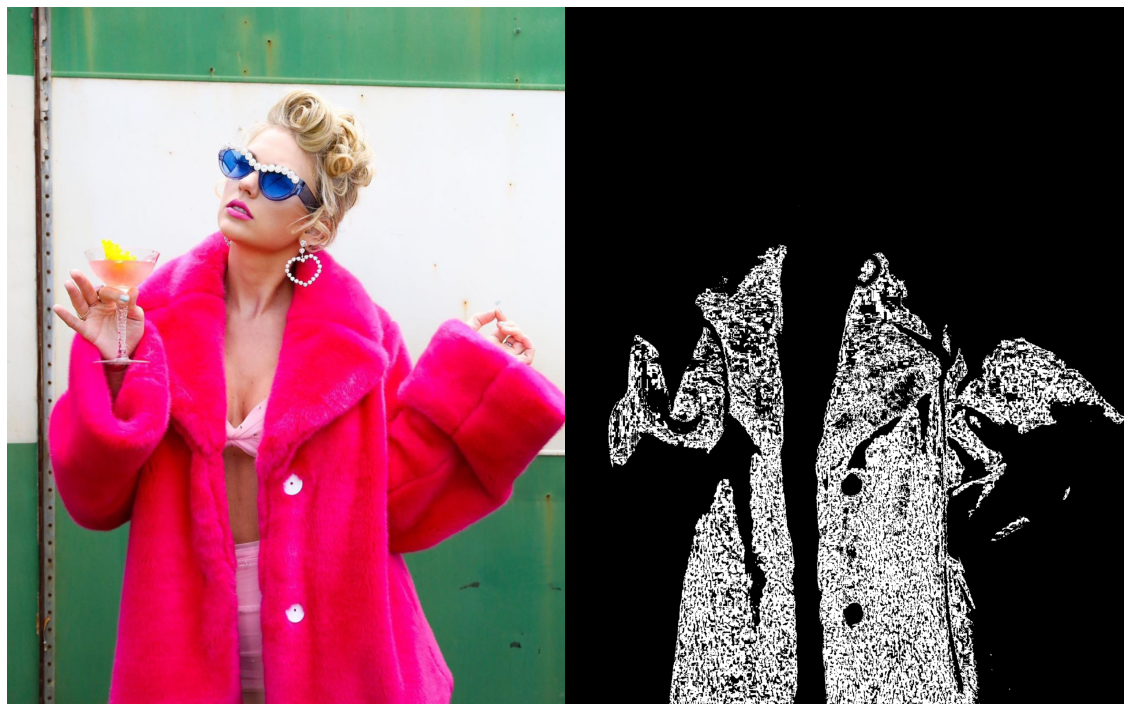

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)

plt.imshow((R_img > R_min) & (R_img < R_max) & (G_img > G_min) & (G_img < G_max) & (B_img > B_min) & (B_img < B_max), cmap='gray')
plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Figures/thresholding.png', bbox_inches = 'tight', dpi = 200)
plt.show()

### Non-Parametric Segmentation

#### Normalized Chromaticity Coordinates (NCC)

In [12]:
def NCC(R,G,B):
    I = R + G + B
   
    I[I == 0] = 1000000
    
    r = R / I
    g = G / I
    b = 1 - r - g

    return r, g ,b 

In [13]:
img = img.astype(float)
img_crop1 = img_crop.astype(float)

R_img,G_img,B_img = RGB(img)
R_img_crop1,G_img_crop1,B_img_crop1 = RGB(img_crop1)

In [14]:
r_img,g_img,b_img = NCC(R_img,G_img,B_img)

r_img_crop1,g_img_crop1,b_img_crop1 = NCC(R_img_crop1,G_img_crop1,B_img_crop1)

In [15]:
b_img = 1 - r_img.flatten() - g_img.flatten()
b_img[b_img < 0] = 0
b_img_crop1 = 1 - r_img_crop1.flatten() - g_img_crop1.flatten()
b_img_crop1[b_img_crop1 < 0] = 0


colors_img = list(zip(r_img.flatten(), g_img.flatten(),b_img))
colors_crop1 = list(zip(r_img_crop1.flatten(), g_img_crop1.flatten(), b_img_crop1))

In [16]:
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, l, min(1, s * scale_l))

In [17]:
scale = 1.5

new_colors_img = [scale_lightness(i, scale) for i in colors_img]
new_colors_crop = [scale_lightness(i, scale) for i in colors_crop1]

running
running


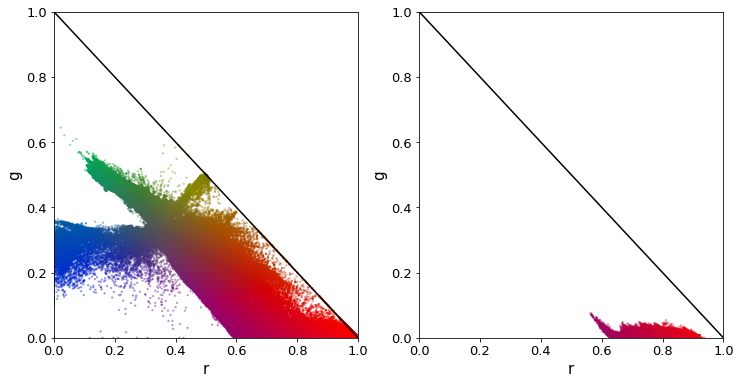

In [18]:
plt.figure(figsize=(12,6))

x = np.linspace(0,1,100)
y = -x+1
print('running')
plt.subplot(121)
#plt.scatter(r_img.flatten(),g_img.flatten(), s = 2, alpha=0.3)
plt.scatter(r_img.flatten(),g_img.flatten(), s = 2, alpha=0.3, c = new_colors_img)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('r', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

print('running')
plt.subplot(122)
#plt.scatter(r_img_crop1.flatten(), g_img_crop1.flatten(), s = 2, alpha=0.3)
plt.scatter(r_img_crop1.flatten(), g_img_crop1.flatten(), s = 2, alpha=0.3, c = new_colors_crop)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('r', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('Figures/ncc2.png', bbox_inches = 'tight', dpi = 200)

plt.show()

In [19]:
for constant in [24]:
    r_img_crop_int = (r_img_crop1 * constant).astype(int)
    g_img_crop_int = (g_img_crop1 * constant).astype(int)

    H_img_crop, xedges_img_crop, yedge_img_crop = np.histogram2d(g_img_crop_int.flatten(),
                                                                 r_img_crop_int.flatten(),
                                                                 bins=constant)

    r_img_int = (r_img * constant).astype(int)
    g_img_int = (g_img * constant).astype(int)

    x,y = r_img_int.shape

    Image = np.zeros([x, y])

    for i in range(x):
        for j in range(y):
            r_val = r_img_int[i][j]
            g_val = g_img_int[i][j]

            if r_val == constant:
                r_val -= 1
            if g_val == constant:
                g_val -= 1

            Image[i][j] = np.log1p(H_img_crop[g_val, r_val])

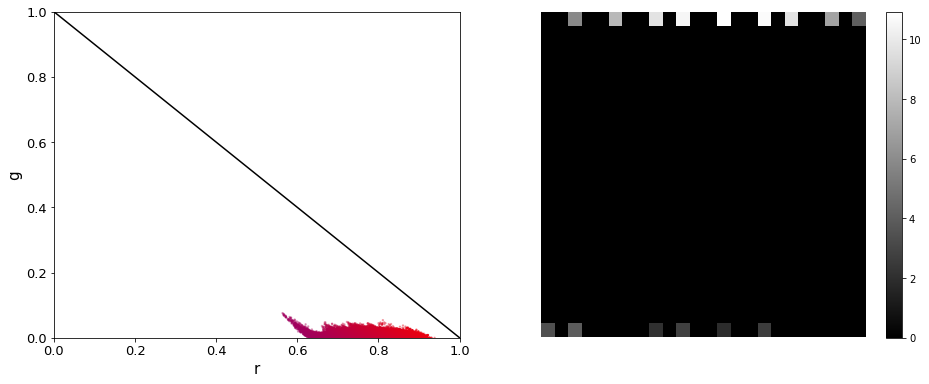

In [20]:
x = np.linspace(0,1,100)
y = -x+1

plt.figure(figsize = (16,6))
plt.subplot(121)
plt.scatter(r_img_crop1.flatten(), g_img_crop1.flatten(), s = 2, alpha=0.3, c = new_colors_crop)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('r', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(122)
plt.imshow(np.log1p(H_img_crop), cmap = 'gray')
plt.colorbar()
plt.axis("off")
plt.savefig("Figures/rg_lookup_table_log.png", bbox_inches = 'tight', dpi = 200)
plt.show()

### Parametric Segmenation

### $p(\mathbf{x}, \mu, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{n/2}|\mathbf{\Sigma}|^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{x} - \mu)^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mu)\right)$

$\mathbf{x}$: [R,G,B] value of the pixel under test.

$\mu$: mean [R,G,B] of the region of interest, and

$\mathbf{\Sigma}$: covariance matrix of the [R,G,B] of the region of interest.

In [21]:
def rgb_cov(image):
    image_re = image.reshape(-1,3)
    image_re -= image_re.mean(0)
    return 1/(image_re.shape[0]-1) * image_re.T @ image_re

In [22]:
def PDF(x_img, x_crop):
    mu = np.mean(x_crop)
    sigma = np.std(x_crop)
    
    factor1 = (1 / (sigma * np.sqrt(2*np.pi)))
    factor2 = np.exp(-(x_img - mu)**2 / (2*(sigma**2)))
    
    return factor1*factor2

In [23]:
img = plt.imread("coat.jpeg")
img_crop = plt.imread("coat_pink.jpeg")

R_img, G_img, B_img = RGB(img)
R_img_crop1,G_img_crop1,B_img_crop1 = RGB(img_crop)

P_R = PDF(R_img, R_img_crop1)
P_G = PDF(G_img, G_img_crop1)
P_B = PDF(B_img, B_img_crop1)

In [24]:
joint_P_RGB = P_R * P_G * P_B

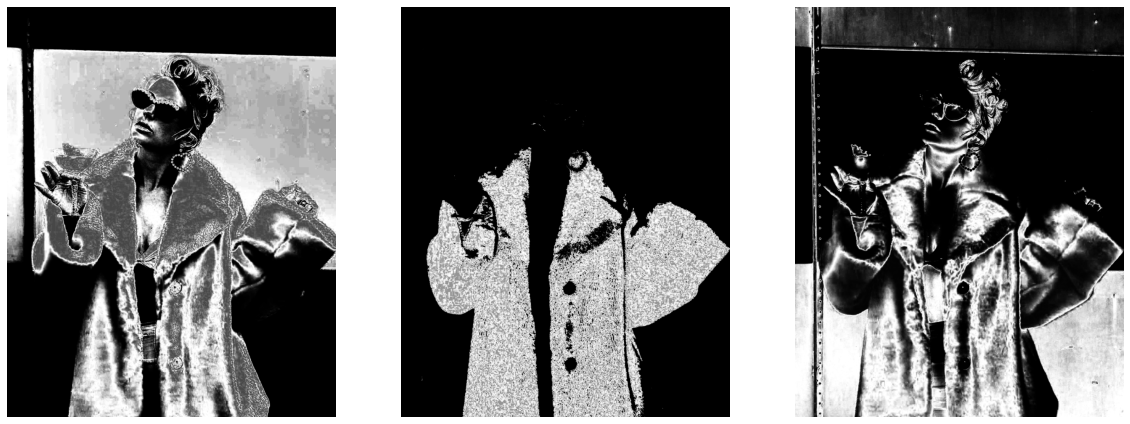

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(P_R, cmap = 'gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(P_G, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.imshow(P_B, cmap = 'gray')
plt.axis('off')
plt.savefig('Figures/parametric_channels.png', bbox_inches = 'tight', dpi = 200)
plt.show()

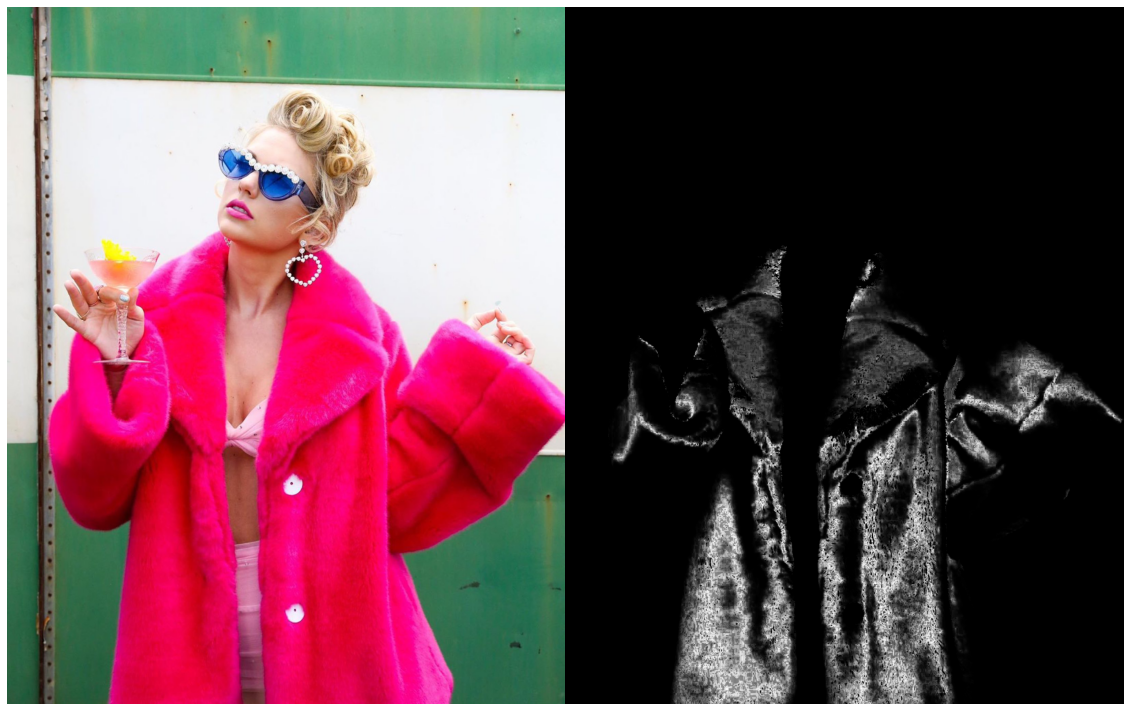

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(plt.imread('coat.jpeg'))
plt.axis('off')
plt.subplot(122)

plt.imshow(joint_P_RGB, cmap='gray')
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Figures/parametric.png', bbox_inches = 'tight', dpi = 200)
plt.show()

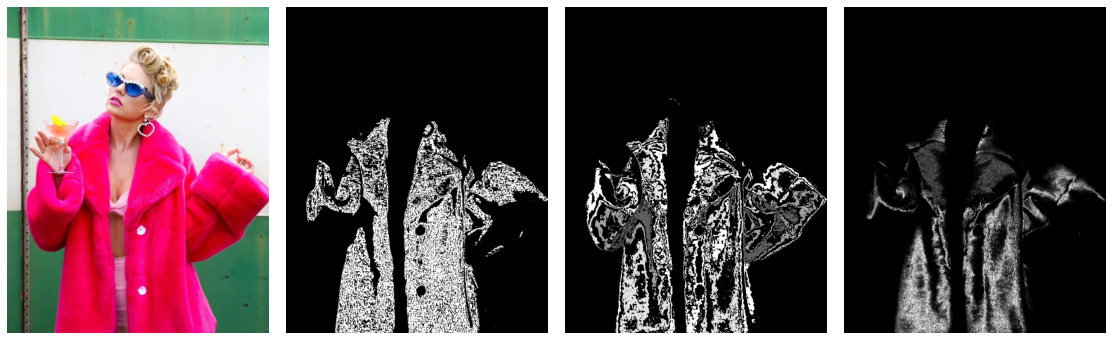

In [27]:
plt.figure(figsize = (20,6))

plt.subplot(141)
plt.imshow(plt.imread('coat.jpeg'))
plt.axis('off')

plt.subplot(142)
plt.imshow((R_img > R_min) & (R_img < R_max) & (G_img > G_min) & (G_img < G_max) & (B_img > B_min) & (B_img < B_max), cmap='gray')
#plt.title('Thresholding')
plt.axis("off")

plt.subplot(143)
plt.imshow(Image, cmap='gray')
#plt.title('Non-Parametric (bins =24)')
plt.axis("off")

plt.subplot(144)
plt.imshow(joint_P_RGB, cmap='gray')
#plt.title('Parametric')
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Figures/coat.png', bbox_inches = 'tight', dpi = 200)
plt.show()